In [74]:
import pandas as pd
import matplotlib.pyplot as plt

from ctdcal.io import load_cnv
# from ctdcal.process_ctd import cast_details

In [70]:
ssscc = '00202'

cast = load_cnv('data/%s.cnv' % ssscc)
#
# cast_proc = cast_details(cast1, '00202')   ## no pump status in cnv files

In [71]:
cast

,prDM,depSM,t090C,c0mS/cm,t190C,c1mS/cm,sbox0Mm/Kg,flECO-AFL,CStarTr0,par,latitude,longitude,timeJ,altM,spar,timeS,scan,flag
0,-0.257,-0.255,10.4911,0.000325,11.4999,0.811015,344.701,0.0759,79.9070,1.000000e-12,-59.3325,-68.49816,363.177743,99.32,17.703,0.000,1,0.0
1,-0.264,-0.261,10.4907,-0.000050,11.4995,0.811610,344.717,0.0833,79.9330,1.000000e-12,-59.3325,-68.49816,363.177744,99.37,17.703,0.042,2,0.0
2,-0.257,-0.255,10.4904,0.000210,11.4992,0.809558,344.501,0.0833,79.9070,1.000000e-12,-59.3325,-68.49816,363.177744,99.39,17.703,0.083,3,0.0
3,-0.257,-0.255,10.4904,0.000499,11.4987,0.809955,344.687,0.0833,79.9590,1.000000e-12,-59.3325,-68.49816,363.177745,99.37,17.703,0.125,4,0.0
4,-0.257,-0.255,10.4899,0.000095,11.4985,0.808466,344.692,0.0759,79.9070,1.000000e-12,-59.3325,-68.49816,363.177745,99.37,17.703,0.167,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169196,-0.512,-0.507,4.2041,14.825882,4.0447,0.001189,267.528,0.0027,50.6625,1.000000e-12,-59.3326,-68.49768,363.259338,99.29,17.703,7049.833,169197,0.0
169197,-0.458,-0.454,4.2052,14.825653,4.0459,0.001062,267.504,0.0027,50.6885,1.000000e-12,-59.3326,-68.49768,363.259339,99.32,17.703,7049.875,169198,0.0
169198,-0.512,-0.507,4.2065,14.822501,4.0472,0.001030,267.241,0.0027,50.6885,1.000000e-12,-59.3326,-68.49768,363.259339,99.34,17.703,7049.917,169199,0.0
169199,-0.512,-0.507,4.2076,14.825745,4.0485,0.001189,267.175,0.0027,50.6625,1.000000e-12,-59.3326,-68.49768,363.259340,99.34,17.703,7049.958,169200,0.0


Text(0.5, 0.98, 'Cast 00202')

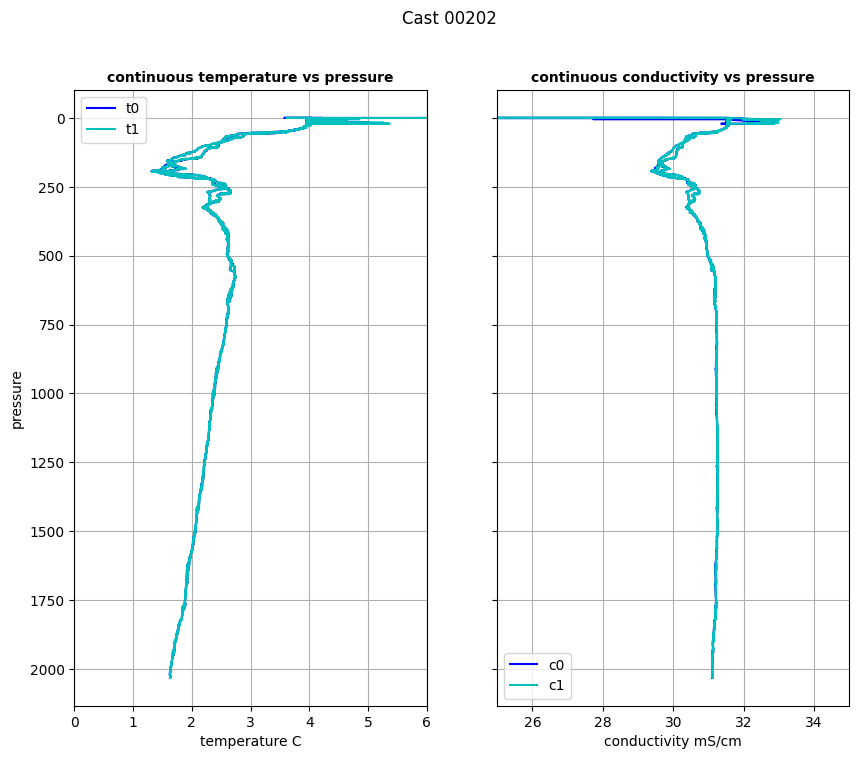

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

# Plot the cast data
ax1.plot(cast["t090C"], cast["prDM"], label="t0", color="b")
ax1.plot(cast["t190C"], cast["prDM"], label="t1", color="c")

# ax1.set_ylim(0, 250)

# Add the lables, legends, grid, etc
ax1.set_ylabel("pressure")
ax1.set_xlabel("temperature C")
ax1.grid()
ax1.invert_yaxis()
ax1.set_xlim(0, 6)
ax1.legend()
ax1.set_title("continuous temperature vs pressure", fontsize=10, weight="bold")

ax2.plot(cast["c0mS/cm"], cast["prDM"], label="c0", color="b")
ax2.plot(cast["c1mS/cm"], cast["prDM"], label="c1", color="c")
ax2.set_xlabel("conductivity mS/cm")
ax2.grid()
ax2.set_xlim(25, 35)
ax2.legend()
ax2.set_title("continuous conductivity vs pressure", fontsize=10, weight="bold")

plt.suptitle("Cast %s" % ssscc)


## Plots of continuous CTD temperature and salinity vs. pressure

- mixed layer 0-30m
- thermocline/halocline 30-60m

In [69]:
# find depth of temp min
temp_minimum = cast.at[cast["t090C"].idxmin(), "depSM"]
print("depth of temperature minimum: %s m, %s deg C" % (temp_minimum, cast["t090C"].min()))

# find depth of conductivity min
cast_d = cast[(cast["prDM"].gt(12))]  # top the data
cond_minimum = cast_d.at[cast_d["c0mS/cm"].idxmin(), "depSM"]
print("depth of conductivity minimum: %s m, %s mS/cm" % (cond_minimum, cast_d["c0mS/cm"].min()))

depth of temperature minimum: 191.24 m, 1.3123 deg C
depth of conductivity minimum: 191.173 m, 29.372292 mS/cm


In [136]:
# Let's parse the bottle and reference t files...

btl_file = "data/%s.btl" % ssscc

with open(btl_file) as f:
    lines = f.readlines()

i = 0
avs = []
for line in lines:
    if line.startswith(("*", "#")):
        continue
    if i % 2 == 0:
        avs.append(line.strip().split())
    i+=1

headers = avs.pop(0)

# rejoin dates
for row in avs:
    row[1:4] = [' '.join(row[1:4])]

btl = pd.DataFrame(avs, columns=headers)

btl_t = pd.read_csv("data/%s.cap.btl_t" % ssscc)
btl_t['prDM'] = btl['PrDM']
btl_t

,index_memory,datetime,bottle_number,diff,raw_value,T90,prDM
0,1,28 Dec 2016 04:55:23,1,24,574482.1,1.632476,2030.643
1,2,28 Dec 2016 05:01:49,2,30,568275.7,1.882910,1764.276
2,3,28 Dec 2016 05:07:06,3,14,565060.6,2.013847,1558.920
3,4,28 Dec 2016 05:12:17,4,20,561771.5,2.148660,1355.648
4,5,28 Dec 2016 05:15:18,5,48,560045.1,2.219778,1257.298
5,6,28 Dec 2016 05:18:25,6,17,558453.6,2.285554,1155.348
6,7,28 Dec 2016 05:21:30,7,17,557036.8,2.344287,1052.834
7,8,28 Dec 2016 05:24:37,8,34,555499.8,2.408190,952.489
8,9,28 Dec 2016 05:27:41,9,109,553362.4,2.497389,851.730
9,10,28 Dec 2016 05:30:52,10,27,551210.6,2.587578,750.042


In [147]:
tc = pd.concat([cast[['t090C', 'prDM']], btl_t[['T90', 'prDM']]])

Text(0.5, 1.0, 'temperature vs pressure')

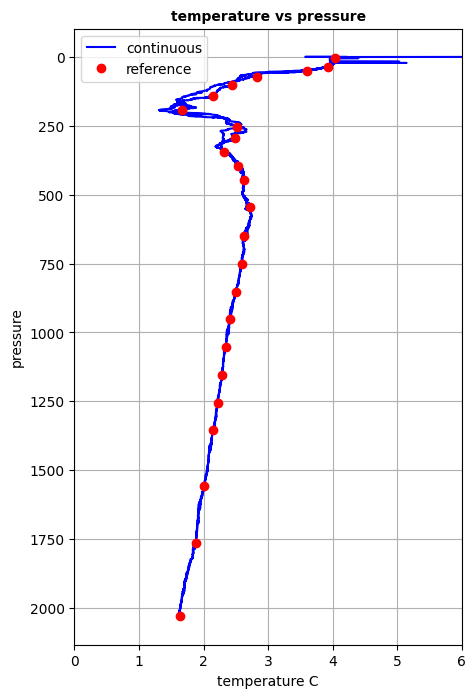

In [150]:
# Plot bottle reference temperature and continuous temperature (t0) vs pressure...
fig, ax = plt.subplots(figsize=(5, 8))

ax.plot(tc["t090C"], tc["prDM"], label="continuous", color="b")
ax.plot(tc["T90"], tc["prDM"], marker="o", linestyle="", label="reference", color="r")

# Add the lables, legends, grid, etc
ax.set_ylabel("pressure")
ax.set_xlabel("temperature C")
ax.grid()
ax.invert_yaxis()
ax.set_xlim(0, 6)
ax.legend()
ax.set_title("temperature vs pressure", fontsize=10, weight="bold")

In [195]:
# Function to plot a station from above code
# *bottle files appear to be inconsistently formatted, so that's addressed here too
def plot_station(ssscc, t_channel='t090C'):
    cast = load_cnv('data/%s.cnv' % ssscc)
    with open("data/%s.btl" % ssscc, encoding='latin-1') as f:
        lines = f.readlines()

    i = 0
    avs = []
    for line in lines:
        if line.startswith(("*", "#")):
            continue
        if i % 2 == 0:
            avs.append(line.strip().split())
        i+=1
    headers = avs.pop(0)
    if len(headers) != len(avs[0]) and headers[-1] != 'T':
        headers.append('T')
    
    # rejoin dates
    for row in avs:
        row[1:4] = [' '.join(row[1:4])]

    btl = pd.DataFrame(avs, columns=headers)

    btl_t = pd.read_csv("data/%s.cap.btl_t" % ssscc)
    btl_t['prDM'] = btl['PrDM']
    tc = pd.concat([cast[['t090C', 't190C', 'prDM']], btl_t[['T90', 'prDM']]])
    
    # Plot bottle reference temperature and continuous temperature (t0) vs pressure...
    fig, ax = plt.subplots(figsize=(5, 8))

    ax.plot(tc[t_channel], tc["prDM"], label="continuous", color="b")
    ax.plot(tc["T90"], tc["prDM"], marker="o", linestyle="", label="reference", color="r")

    # Add the lables, legends, grid, etc
    ax.set_ylabel("pressure")
    ax.set_xlabel("temperature C")
    ax.grid()
    ax.invert_yaxis()
    ax.legend()
    ax.set_title(("Station: %s - temperature vs pressure" % ssscc), fontsize=10, weight="bold")

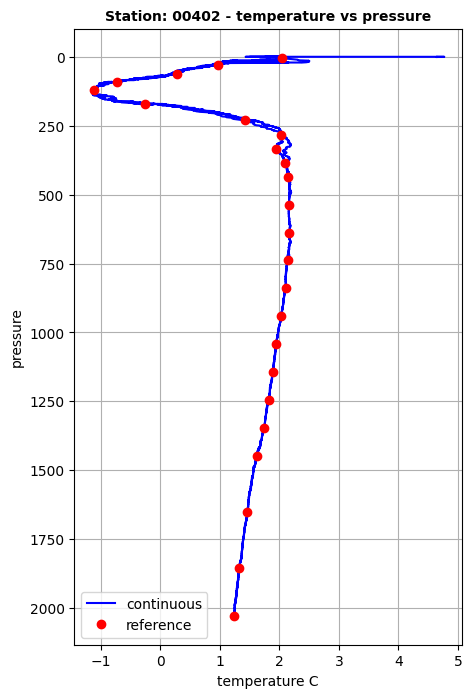

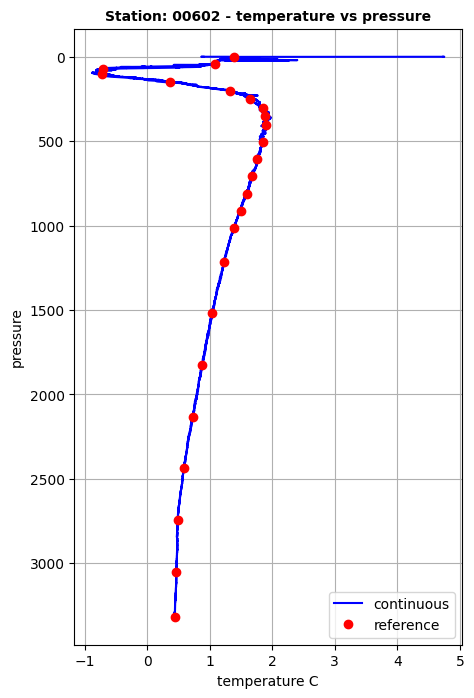

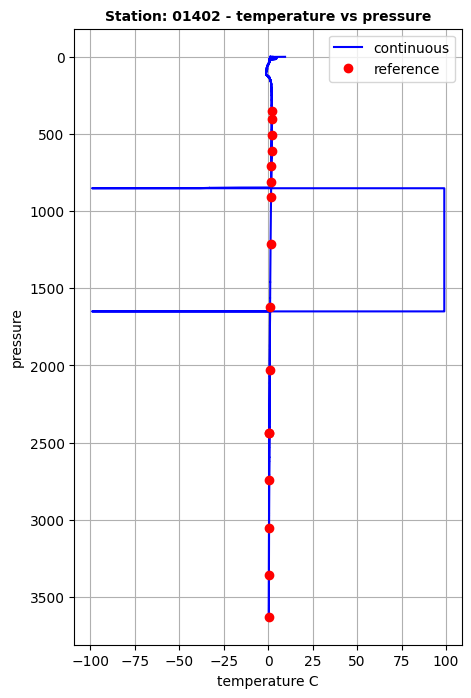

In [196]:
# Plot some other stations...
plot_station('00402')

plot_station('00602')

plot_station('01402')

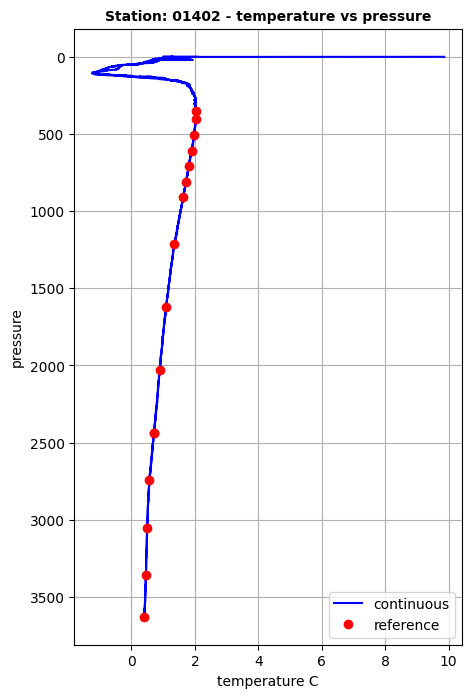

In [198]:
# That last one had a faulty temperature sensor, let's try the secondary sensor...
plot_station('01402', 't190C')